In [4]:
from tools import calculate_SNR
import os, subprocess, sys
import numpy as np
from pyBBarolo.utils import SimulatedGalaxyCube
from astropy.table import Table 
import matplotlib.pyplot as plt
from pyBBarolo.wrapper import PVSlice
from pyBBarolo.wrapper import SpatialSmoothing
from astropy.io import fits
fitsfile = "/home/user/THESIS/models/benchmark_galaxy/benchmark_galaxy.fits"

In order to create the mock galaxies we have to set the following parameters for each radius (i have to change the value in order to create a realistic galaxy) -> create files with ring parameters:
- **ROTATIONAL VELOCITY** ( with different rotation curves)
- **DISPPERSION VELOCITY** (random motion of gas)
- **SURFACE BRIGHTNESS** (density of mass essentially)
- **INCLINATION** (warps)
- **POSITION ANGLE** (warps)

This code is to create the input files to run bbarolo with the correct parameters.

Other parameters that I have to change for the entire galaxy are (IMPORTANT):
- **RESOLUTION** (related to the beam size, i have to choose it taking in consideration the size of the galazy)
- **SIGNAL TO NOISE RATIO** (relatedwith the total flux, i can create a noise cube and then add it to the mock galaxy, i want an specific N/S so i can calculate it with my source)

## Rotational velocity
- i have to create different shapes of the velocity curve
- the most common is the hyperbolic tangent 
- in the position-velocity graph (remember s shape is major axis) i can see the shape of the veloity with the shape of the two "wings" , so if its very straigt you have a kinda constant velocity. To observe the rotational velocity from the graph i can just substract the systemic velocity( the middle line of the graph), remember the negative velocity is guetting closer to us. Remember that in that graph we see the line of sight velocity not the actual velocity, we have to correct with the following equation:
$$
  v_{los}(x,y) = v_{sys} + v_{rot}(R)sin{i} cos{\theta}
$$


## Dispersion velocity
- random movements of the gas 
- we can see it in the velocity-position plot by the width
- it normally reduces with radius 
- there are two main reasosn of random motion: temperature (kin energy) and turbulence (from SN explossions etc, a random burst of kinetic energy) --> check paper of Cecilia 

## Surface brightness
- normally an exponential profile --> stark exponential?

In [5]:
def profexpo(li, R): #vi is a single number and r is a list of values 
    prof = []
    for r in R:
        l = li + r**(-2)
        l = round(l, 3)
        prof.append(l)
    return prof

In [8]:
smoothed_gal = SpatialSmoothing(fitsfile,120)

TypeError: SpatialSmoothing.__init__() takes 2 positional arguments but 3 were given

In [9]:
radmax  = 300   #Value in model1 = 240
radii   = np.arange(0,radmax,20)


density_exp = 20*np.exp(-radii/100-50/(0.5*radii+100))
density_const = np.full(len(radii),1) 
vrot_arctan = 2./np.pi*200*np.arctan(radii/50.)
vrot_flat = np.full(len(radii),150) 
vdisp = 10 + 50*np.exp(-radii/50.)
vdisp_flat = np.full(len(radii),10) 

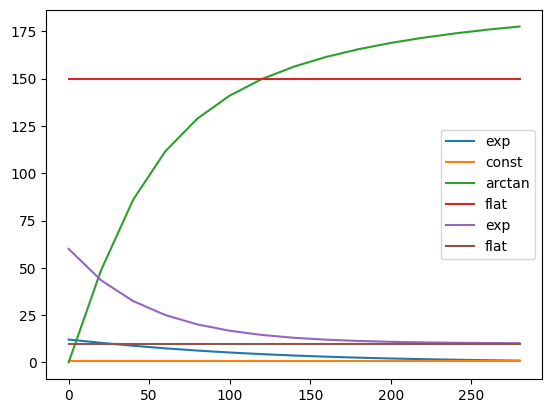

In [10]:

plt.plot(radii, density_exp, label='exp')
plt.plot(radii, density_const, label='const')
plt.plot(radii, vrot_arctan, label='arctan')
plt.plot(radii, vrot_flat, label='flat')
plt.plot(radii, vdisp, label='exp')
plt.plot(radii, vdisp_flat, label='flat')
plt.legend()    
plt.show()